In [1]:
import numpy as np 
import pandas as pd 
import matplotlib as plt

In [20]:
def significant_corr(df1,df2,a,b):
  import scipy.stats as stats
  if df2.empty:
    df2=df1
  r = stats.pearsonr(df1[a], df2[b])
  if r[1] < 0.1:
    return (True,r[0])
  else:
    return (False,0)

def print_significant_corr(df1,df2,a,b):
  if df2.empty:
    df2=df1
  import scipy.stats as stats
  r = stats.pearsonr(df1[a], df2[b])
  if r[1] < 0.1:
    print(f'Correlation between:  ' + a + '   and   ' + b)
    print('**********************************************')
    print(f'Pearson Correlation: {r[0]}, p-value: {r[1]}')
    print('*Statistically significant*')
    print('***********************************************')

In [35]:
ieco_grf_df=pd.read_csv('iEco_&_graph.csv')
ieco_df=pd.read_csv('iEco.csv')
ieco_df_copy=pd.read_csv('iEco(copy).csv')
grf_df=pd.read_csv('../Tidy_DataFrame.csv')
grf_sin_islas_nd=pd.read_csv('../Gephi_sin_islas/CABA sin islas nodes.csv')
full_ieco_df=pd.read_csv('full_iEco.csv')

In [13]:
ieco_df

,Unnamed: 0,1 Foundational Institutions,2.01 I-Human Capital,2.02 I-Funding,2.03 I-Infrastructure,2.04 I-Demand,2.05 I-Culture & Incentives,3.01 E-Human Capital,3.02 E-Funding,3.03 E-Infrastructure,3.04 E-Demand,3.05 E-Culture & Incentives,4 Comparative Advantage,5 Impact
0,1,3.522,2.278000,1.5600,3.3175,3.110000,2.515,3.115,2.300000,3.6275,3.430,3.233333,2.93,1.985455
1,0,3.169,2.034667,1.7400,3.3100,2.716667,1.795,3.075,1.723333,3.7125,3.175,2.611667,2.58,2.094545
2,2,3.913,2.580667,1.2025,3.6925,2.960000,1.955,4.155,2.206667,3.9975,3.205,4.121667,3.11,2.375455
3,5,3.177,1.828000,1.8400,3.2650,2.876667,2.755,2.975,1.991667,3.6775,3.460,3.228333,2.74,2.088182
4,4,3.929,2.992000,1.9500,3.9525,3.076667,3.830,3.190,2.423333,4.2925,3.365,2.910000,2.84,2.270000
5,3,3.780,2.171333,1.5025,3.6150,2.570000,1.245,3.045,2.005000,3.9050,2.740,2.613333,2.48,2.257879


In [14]:
ieco_df_copy

,Unnamed: 0,1 Foundational Institutions,2.01 I-Human Capital,2.02 I-Funding,2.03 I-Infrastructure,2.04 I-Demand,2.05 I-Culture & Incentives,3.01 E-Human Capital,3.02 E-Funding,3.03 E-Infrastructure,3.04 E-Demand,3.05 E-Culture & Incentives,4 Comparative Advantage,5 Impact
0,México,3.522,2.278000,1.5600,3.3175,3.110000,2.515,3.115,2.300000,3.6275,3.430,3.233333,2.93,1.985455
1,Argentina,3.169,2.034667,1.7400,3.3100,2.716667,1.795,3.075,1.723333,3.7125,3.175,2.611667,2.58,2.094545
2,Chile,3.913,2.580667,1.2025,3.6925,2.960000,1.955,4.155,2.206667,3.9975,3.205,4.121667,3.11,2.375455
3,Brasil,3.177,1.828000,1.8400,3.2650,2.876667,2.755,2.975,1.991667,3.6775,3.460,3.228333,2.74,2.088182
4,España,3.929,2.992000,1.9500,3.9525,3.076667,3.830,3.190,2.423333,4.2925,3.365,2.910000,2.84,2.270000
5,Uruguay,3.780,2.171333,1.5025,3.6150,2.570000,1.245,3.045,2.005000,3.9050,2.740,2.613333,2.48,2.257879


In [15]:
grf_df

,Ciudad,País,avg strength,weight,Degree,Weighted Degree,Eccentricidad,Clustering,Modularidad con pesos (0.8),Modularidad con pesos (1.0),...,Modularidad sin pesos (0.8),Modularidad sin pesos (1.0),Modularidad sin pesos (1.2),Diámetro,Radio,Camino más corto promedio,Transitividad,Eficiencia Global,Small Worldness,Core Ratio
0,CABA,Argentina,3.244633,1.481579,4.385965,14.017544,4.798246,0.148791,0.402,0.524,...,0.497,0.493,0.499,6,3,3.355669,0.107392,0.325773,0.960807,0.495614
1,CDMX,México,3.477388,1.388629,3.658863,12.963211,5.622074,0.075940,0.484,0.628,...,0.602,0.604,0.601,7,4,3.820318,0.050000,0.289320,0.677149,0.421405
2,Santiago de Chile,Chile,3.417211,1.462564,3.948718,13.764103,5.041026,0.134037,0.530,0.530,...,0.496,0.500,0.505,6,3,3.227544,0.100744,0.338889,0.906814,0.430769
3,Montevideo,Uruguay,3.227742,2.749495,7.747475,25.939394,4.479798,0.207747,0.472,0.611,...,0.353,0.348,0.337,6,3,3.081116,0.224523,0.360837,1.274519,0.565657
4,Madrid,España,3.518387,1.362343,3.790795,12.861925,6.079498,0.120510,0.611,0.610,...,0.568,0.572,0.563,8,5,3.783517,0.081917,0.294653,1.141033,0.439331
5,Sao Paulo,Brasil,3.430669,1.253704,3.370370,11.694444,6.726852,0.129928,0.686,0.682,...,0.673,0.664,0.661,8,4,4.324031,0.078571,0.266719,1.211794,0.421296


In [18]:
ieco_grf_df

,Unnamed: 0,1 Foundational Institutions,2.01 I-Human Capital,2.02 I-Funding,2.03 I-Infrastructure,2.04 I-Demand,2.05 I-Culture & Incentives,3.01 E-Human Capital,3.02 E-Funding,3.03 E-Infrastructure,...,Modularidad sin pesos (0.8),Modularidad sin pesos (1.0),Modularidad sin pesos (1.2),Diámetro,Radio,Camino más corto promedio,Transitividad,Eficiencia Global,Small Worldness,Core Ratio
0,0,3.169,2.034667,1.7400,3.3100,2.716667,1.795,3.075,1.723333,3.7125,...,0.497,0.493,0.499,6,3,3.355669,0.107392,0.325773,0.960807,0.495614
1,1,3.522,2.278000,1.5600,3.3175,3.110000,2.515,3.115,2.300000,3.6275,...,0.602,0.604,0.601,7,4,3.820318,0.050000,0.289320,0.677149,0.421405
2,2,3.913,2.580667,1.2025,3.6925,2.960000,1.955,4.155,2.206667,3.9975,...,0.496,0.500,0.505,6,3,3.227544,0.100744,0.338889,0.906814,0.430769
3,3,3.780,2.171333,1.5025,3.6150,2.570000,1.245,3.045,2.005000,3.9050,...,0.353,0.348,0.337,6,3,3.081116,0.224523,0.360837,1.274519,0.565657
4,4,3.929,2.992000,1.9500,3.9525,3.076667,3.830,3.190,2.423333,4.2925,...,0.568,0.572,0.563,8,5,3.783517,0.081917,0.294653,1.141033,0.439331
5,5,3.177,1.828000,1.8400,3.2650,2.876667,2.755,2.975,1.991667,3.6775,...,0.673,0.664,0.661,8,4,4.324031,0.078571,0.266719,1.211794,0.421296


In [85]:
full_ieco_df=full_ieco_df.rename({0:1,1:0,5:3,3:5},axis='index')
full_ieco_df

,Unnamed: 0,1.01 Ease of doing business (WB),1.02 Starting a business (WB),1.03 Paying taxes (WB),1.04 Resolving Insolvency (WB),1.05 Enforcing contracts (WB),1.06 Property Rights (IEF),1.07 Government Integrity (IEF),1.08 Labor Freedom (IEF),1.09 Trade freedom (IEF),...,5.02 Social Progress Index,5.03 Inclusive Development Index,5.04 Population below international poverty line (SDG 1 - No poverty),5.05 Prevalence of undernourishment (SDG 2 - Zero Hunger),5.06 Annual growth rate of real GDP per capita (SDG 8 - Decent Jobs and Economic Growth),5.07 Unemployment rate of population 15 years of age and older (SDG 8 - Decent Jobs and Economic Growth),"5.08 Carbon dioxide emissions per unit of GDP (SDG 9 - Industry, Innovation and Infrastructure)",5.09 Proportion of urban population living in slums (SDG 11 - Sustainable Cities and Communities),5.10 Annual population-weighted average mean concentration of fine suspended particles of less than 2.5 microns in diameter (SDG 11 - Sustainable Cities and Communities),5.11 Domestic material consumption per capita (SDG 12 - Responsible Consumption and Production)
1,México,3.90,4.44,3.63,3.81,3.68,3.33,2.47,3.34,4.50,...,3.82,3.08,4.80,4.88,3.34,4.72,4.33,4.520000,4.32,1.71
0,Argentina,3.36,4.22,2.97,2.60,3.30,3.02,2.99,2.86,3.77,...,4.07,3.09,4.97,4.88,3.58,3.94,4.20,4.580000,4.71,2.03
2,Chile,3.90,4.66,4.01,3.40,3.59,3.80,3.94,3.59,4.56,...,4.20,3.29,4.94,4.93,3.32,4.16,4.29,4.840000,4.28,5.00
5,Brasil,3.36,4.25,2.38,3.02,3.56,3.29,2.82,2.98,3.71,...,3.91,2.95,4.61,5.00,3.22,3.26,4.60,4.510000,4.73,2.18
4,España,4.12,4.48,4.39,4.17,3.84,4.00,3.20,3.31,4.46,...,4.50,3.27,4.92,5.00,3.82,2.57,4.56,4.900000,4.82,1.68
3,Uruguay,3.46,4.58,3.81,3.14,3.25,3.88,3.94,3.84,4.10,...,4.11,3.31,4.99,5.00,3.67,4.02,4.87,4.643333,4.87,4.32


In [80]:
full_ieco_grf_df=pd.concat([full_ieco_df,grf_df],axis=1)
full_ieco_grf_df

,Unnamed: 0,1.01 Ease of doing business (WB),1.02 Starting a business (WB),1.03 Paying taxes (WB),1.04 Resolving Insolvency (WB),1.05 Enforcing contracts (WB),1.06 Property Rights (IEF),1.07 Government Integrity (IEF),1.08 Labor Freedom (IEF),1.09 Trade freedom (IEF),...,Modularidad sin pesos (0.8),Modularidad sin pesos (1.0),Modularidad sin pesos (1.2),Diámetro,Radio,Camino más corto promedio,Transitividad,Eficiencia Global,Small Worldness,Core Ratio
0,Argentina,3.36,4.22,2.97,2.60,3.30,3.02,2.99,2.86,3.77,...,0.497,0.493,0.499,6,3,3.355669,0.107392,0.325773,0.960807,0.495614
1,México,3.90,4.44,3.63,3.81,3.68,3.33,2.47,3.34,4.50,...,0.602,0.604,0.601,7,4,3.820318,0.050000,0.289320,0.677149,0.421405
2,Chile,3.90,4.66,4.01,3.40,3.59,3.80,3.94,3.59,4.56,...,0.496,0.500,0.505,6,3,3.227544,0.100744,0.338889,0.906814,0.430769
3,Uruguay,3.46,4.58,3.81,3.14,3.25,3.88,3.94,3.84,4.10,...,0.353,0.348,0.337,6,3,3.081116,0.224523,0.360837,1.274519,0.565657
4,España,4.12,4.48,4.39,4.17,3.84,4.00,3.20,3.31,4.46,...,0.568,0.572,0.563,8,5,3.783517,0.081917,0.294653,1.141033,0.439331
5,Brasil,3.36,4.25,2.38,3.02,3.56,3.29,2.82,2.98,3.71,...,0.673,0.664,0.661,8,4,4.324031,0.078571,0.266719,1.211794,0.421296


In [58]:
list1=list(ieco_df.keys())
list2=list(grf_df.keys())

list2.remove('Ciudad')
list2.remove('País')

positive_pairs=[]
negative_pairs=[]

for key1 in list1:
    for key2 in list2:
        sig,corr=significant_corr(ieco_grf_df,ieco_grf_df,key1,key2)
        if sig==True:
            if corr>0:
                positive_pairs.append((key1,key2))
            else:
                negative_pairs.append((key1,key2))

In [31]:
for keys in positive_pairs:
    print_significant_corr(ieco_grf_df,ieco_grf_df,keys[0],keys[1])

Correlation between:  Unnamed: 0   and   Modularidad con pesos (0.8)
**********************************************
Pearson Correlation: 0.9070035925942317, p-value: 0.012570365792290258
*Statistically significant*
***********************************************
Correlation between:  2.02 I-Funding   and   Diámetro
**********************************************
Pearson Correlation: 0.7385065695777545, p-value: 0.09362791589032411
*Statistically significant*
***********************************************
Correlation between:  2.04 I-Demand   and   avg strength
**********************************************
Pearson Correlation: 0.952116314101418, p-value: 0.00338437607108655
*Statistically significant*
***********************************************
Correlation between:  2.04 I-Demand   and   Modularidad sin pesos (1.0)
**********************************************
Pearson Correlation: 0.734259553485187, p-value: 0.09654394994934125
*Statistically significant*
*************************

In [33]:
for keys in negative_pairs:
    print_significant_corr(ieco_grf_df,ieco_grf_df,keys[0],keys[1])

Correlation between:  2.04 I-Demand   and   weight
**********************************************
Pearson Correlation: -0.7513026741395321, p-value: 0.08508453028112797
*Statistically significant*
***********************************************
Correlation between:  2.04 I-Demand   and   Degree
**********************************************
Pearson Correlation: -0.7930354359599853, p-value: 0.059818901855709296
*Statistically significant*
***********************************************
Correlation between:  2.04 I-Demand   and   Weighted Degree
**********************************************
Pearson Correlation: -0.7540324234088824, p-value: 0.0833095479157745
*Statistically significant*
***********************************************
Correlation between:  2.04 I-Demand   and   Clustering
**********************************************
Pearson Correlation: -0.9174944429171862, p-value: 0.00992993587365419
*Statistically significant*
***********************************************
Correla

In [86]:
#list1=list(full_ieco_df.keys())
list1=['2.04a Government procurement of advanced technology (GCI)','2.04b University-industry research collaborations (GII)','2.04c Trade, Competition & Market scale (GII)','3.04a Buyer sophistication (GCI 4.0)','3.04b Domestic Market Scale (GII)']
list2=list(grf_df.keys())

list2.remove('Ciudad')
list2.remove('País')

positive_pairs_2=[]
negative_pairs_2=[]

for key1 in list1:
    for key2 in list2:
        sig,corr=significant_corr(full_ieco_grf_df,full_ieco_grf_df,key1,key2)
        if sig==True:
            if corr>0:
                positive_pairs_2.append((key1,key2))
            else:
                negative_pairs_2.append((key1,key2))

In [87]:
for keys in positive_pairs_2:
    print_significant_corr(full_ieco_grf_df,full_ieco_grf_df,keys[0],keys[1])

Correlation between:  2.04b University-industry research collaborations (GII)   and   avg strength
**********************************************
Pearson Correlation: 0.9057240787070973, p-value: 0.012912964197428016
*Statistically significant*
***********************************************
Correlation between:  2.04b University-industry research collaborations (GII)   and   Modularidad sin pesos (0.8)
**********************************************
Pearson Correlation: 0.7673664022805716, p-value: 0.07488270820594144
*Statistically significant*
***********************************************
Correlation between:  2.04b University-industry research collaborations (GII)   and   Modularidad sin pesos (1.0)
**********************************************
Pearson Correlation: 0.7926698310673228, p-value: 0.060022571945509924
*Statistically significant*
***********************************************
Correlation between:  2.04b University-industry research collaborations (GII)   and   Modula

In [89]:
for keys in negative_pairs_2:
    print_significant_corr(full_ieco_grf_df,full_ieco_grf_df,keys[0],keys[1])

Correlation between:  2.04b University-industry research collaborations (GII)   and   weight
**********************************************
Pearson Correlation: -0.8026827654539166, p-value: 0.05455995298570256
*Statistically significant*
***********************************************
Correlation between:  2.04b University-industry research collaborations (GII)   and   Degree
**********************************************
Pearson Correlation: -0.8537047923796843, p-value: 0.03053790559238056
*Statistically significant*
***********************************************
Correlation between:  2.04b University-industry research collaborations (GII)   and   Weighted Degree
**********************************************
Pearson Correlation: -0.8072291739267888, p-value: 0.05215914812809959
*Statistically significant*
***********************************************
Correlation between:  2.04b University-industry research collaborations (GII)   and   Clustering
*********************************

In [ ]:
list1=list(full_ieco_df.keys())
list2=list(grf_df.keys())

list2.remove('Ciudad')
list2.remove('País')

positive_pairs=[]
negative_pairs=[]

for key1 in list1:
    for key2 in list2:
        sig,corr=significant_corr(ieco_grf_df,ieco_grf_df,key1,key2)
        if sig==True:
            if corr>0:
                positive_pairs.append((key1,key2))
            else:
                negative_pairs.append((key1,key2))

In [7]:
grf_sin_islas_nd=grf_sin_islas_nd.drop('indegree',axis=1)
grf_sin_islas_nd=grf_sin_islas_nd.drop('outdegree',axis=1)
grf_sin_islas_nd=grf_sin_islas_nd.drop('weighted indegree',axis=1)
grf_sin_islas_nd=grf_sin_islas_nd.drop('weighted outdegree',axis=1)
grf_sin_islas_nd=grf_sin_islas_nd.drop('timeset',axis=1)
grf_sin_islas_nd=grf_sin_islas_nd.drop('Id',axis=1)
grf_sin_islas_nd=grf_sin_islas_nd.drop('modularity_class',axis=1)

grf_sin_islas_nd

,Label,d1,d0,Degree,Weighted Degree,Eccentricity,closnesscentrality,harmonicclosnesscentrality,betweenesscentrality,Authority,Hub
0,El Cronista,1.200000,Promotor,2,6,4,0.352201,0.378720,1.910913,0.059762,0.000000
1,Endeavor Argentina,7.600000,Habilitador,22,71,3,0.497778,0.563988,484.279725,0.350454,0.089742
2,UNSAM,1.800000,Generador de conocimiento,3,11,4,0.369637,0.398065,10.822184,0.055075,0.007620
3,IncUBAgro,1.600000,Habilitador,9,36,4,0.392982,0.436756,160.377233,0.009692,0.086704
4,Namastrade,0.200000,Habilitador,2,2,5,0.284987,0.305506,0.000000,0.000000,0.008552
...,...,...,...,...,...,...,...,...,...,...,...
108,SEPYME,16.799999,Articulador,34,109,3,0.565657,0.625000,1045.433890,0.505138,0.132082
109,CONICET,5.200000,Articulador,7,26,4,0.435798,0.472470,95.553264,0.196161,0.000000
110,Club Trama,1.800000,Comunidad,4,6,4,0.405797,0.436756,8.704167,0.014348,0.045557
111,Ministerio de Producción y Trabajo,8.600000,Articulador,10,33,4,0.402878,0.454613,165.348171,0.146872,0.000321


In [8]:
num_sin_islas=grf_sin_islas_nd.drop('Label',axis=1)
num_sin_islas=num_sin_islas.drop('d0',axis=1)
num_sin_islas

,d1,Degree,Weighted Degree,Eccentricity,closnesscentrality,harmonicclosnesscentrality,betweenesscentrality,Authority,Hub
0,1.200000,2,6,4,0.352201,0.378720,1.910913,0.059762,0.000000
1,7.600000,22,71,3,0.497778,0.563988,484.279725,0.350454,0.089742
2,1.800000,3,11,4,0.369637,0.398065,10.822184,0.055075,0.007620
3,1.600000,9,36,4,0.392982,0.436756,160.377233,0.009692,0.086704
4,0.200000,2,2,5,0.284987,0.305506,0.000000,0.000000,0.008552
...,...,...,...,...,...,...,...,...,...
108,16.799999,34,109,3,0.565657,0.625000,1045.433890,0.505138,0.132082
109,5.200000,7,26,4,0.435798,0.472470,95.553264,0.196161,0.000000
110,1.800000,4,6,4,0.405797,0.436756,8.704167,0.014348,0.045557
111,8.600000,10,33,4,0.402878,0.454613,165.348171,0.146872,0.000321


In [10]:
from sklearn.preprocessing import StandardScaler

#column_maxes = num_sin_islas.max()
#normalized_sin_islas = num_sin_islas / column_maxes

X=num_sin_islas.to_numpy()

normalized_sin_islas= StandardScaler().fit_transform(X)

normalized_sin_islas

array([[-0.44953383, -0.64943703, -0.638651  , ..., -0.46812709,
        -0.01584602, -0.63528399],
       [ 2.21524376,  2.46015551,  2.50537821, ...,  1.95876633,
         4.03840497,  0.49491397],
       [-0.19971093, -0.4939574 , -0.3968026 , ..., -0.42329271,
        -0.08121512, -0.53931879],
       ...,
       [-0.19971093, -0.33847777, -0.638651  , ..., -0.43394888,
        -0.64923034, -0.06154562],
       [ 2.63161525,  0.59439999,  0.66733037, ...,  0.35415826,
         1.19906806, -0.63124136],
       [-0.69935672,  0.59439999,  0.28037292, ...,  0.21676057,
        -0.11719811,  1.71102722]])

In [11]:
#normalized_sin_islas=normalized_sin_islas.drop('Degree',axis=1)
#normalized_sin_islas=normalized_sin_islas.drop('Weighted Degree',axis=1)


from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0).fit(normalized_sin_islas)

kmeans.labels_

array([0, 4, 2, 2, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 2, 4, 0, 0, 2, 2, 0, 2,
       0, 2, 0, 0, 2, 3, 0, 0, 3, 0, 0, 2, 0, 3, 1, 0, 0, 0, 0, 0, 0, 3,
       0, 3, 0, 2, 3, 0, 2, 2, 3, 0, 2, 2, 0, 2, 0, 1, 2, 2, 0, 0, 3, 2,
       0, 0, 0, 0, 4, 3, 3, 2, 2, 3, 0, 2, 0, 3, 0, 2, 2, 0, 3, 3, 1, 3,
       1, 2, 0, 0, 0, 2, 0, 2, 3, 0, 0, 2, 0, 0, 0, 3, 0, 0, 2, 3, 4, 1,
       2, 1, 3])

In [12]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
prin_comp=pca.fit_transform(normalized_sin_islas)

prin_comp_df = pd.DataFrame(data = prin_comp, columns = ['principal component 1', 'principal component 2'])

prin_comp_df

,principal component 1,principal component 2
0,-1.412413,0.258862
1,6.659906,2.223230
2,-0.934391,0.262811
3,0.625324,-0.813272
4,-3.278386,0.312849
...,...,...
108,11.706472,4.948728
109,1.512172,2.063453
110,-0.512061,-0.362019
111,1.826925,2.409508


In [13]:
roles=[]
for i in range(113):
    if prin_comp_df['principal component 1'][i]>0:
        if prin_comp_df['principal component 2'][i]>0:
            roles.append('Articulador')
        else:
            roles.append('Generador de conocimiento')
    else:
        if prin_comp_df['principal component 2'][i]>0:
            roles.append('Habilitador')
        else:
            roles.append('Comunidad')

In [14]:
print(pca.components_)
print(pca.explained_variance_ratio_)
pca.noise_variance_

[[ 0.28242153  0.37834286  0.37678082 -0.27202297  0.36728138  0.37049777
   0.35638314  0.27112952  0.29740562]
 [ 0.5430792  -0.04827429 -0.03635006  0.32509258 -0.03383781 -0.05654112
  -0.04259071  0.59277462 -0.48804759]]
[0.74578279 0.13452807]


0.1552600203917833

In [15]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(prin_comp)

kmeans.labels_

array([1, 2, 1, 4, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 4, 2, 1, 1, 1, 4, 1, 1,
       1, 1, 1, 1, 4, 0, 1, 1, 0, 1, 1, 1, 1, 4, 3, 1, 1, 1, 1, 1, 1, 4,
       1, 0, 1, 4, 4, 1, 4, 1, 0, 1, 1, 1, 1, 1, 1, 3, 4, 1, 1, 1, 4, 4,
       1, 1, 1, 1, 2, 0, 0, 1, 1, 0, 1, 4, 1, 4, 1, 4, 1, 1, 4, 4, 3, 0,
       0, 4, 1, 1, 1, 1, 1, 1, 0, 1, 1, 4, 1, 1, 1, 0, 1, 1, 4, 0, 2, 3,
       4, 3, 4])

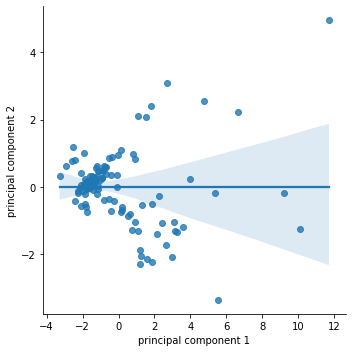

In [16]:
import seaborn as sns

sns.lmplot(x='principal component 1', y='principal component 2', data=prin_comp_df)

In [25]:
attr_mat_df=pd.read_csv('Attribute Mixing Matrices.csv')

rol_map_esp={'Generador de conocimiento':0,'Habilitador':1,'Promotor':2,
             'Vinculador':3,'Articulador':4,'Comunidad':5}

attr_mat_df

,Unnamed: 0,Ciudad,"(0,0)","(0,1)","(0,2)","(0,3)","(0,4)","(0,5)","(1,0)","(1,1)",...,"(4,2)","(4,3)","(4,4)","(4,5)","(5,0)","(5,1)","(5,2)","(5,3)","(5,4)","(5,5)"
0,0,CABA,0.015086,0.038793,0.008621,0.017241,0.047414,0.0,0.056034,0.318966,...,0.000000,0.015086,0.032328,0.000000,0.002155,0.015086,0.000000,0.000000,0.004310,0.000000
1,1,CDMX,0.003984,0.023904,0.001992,0.001992,0.011952,0.0,0.037849,0.513944,...,0.000000,0.001992,0.007968,0.003984,0.000000,0.051793,0.005976,0.005976,0.003984,0.003984
2,2,Santiago de Chile,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.371094,...,0.023438,0.003906,0.046875,0.003906,0.000000,0.031250,0.000000,0.011719,0.011719,0.003906
3,3,Montevideo,0.025298,0.055060,0.000000,0.013393,0.031250,0.0,0.072917,0.221726,...,0.004464,0.037202,0.052083,0.000000,0.000000,0.007440,0.000000,0.000000,0.001488,0.008929
4,4,Madrid,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.423780,...,0.006098,0.042683,0.076220,0.000000,0.000000,0.030488,0.006098,0.003049,0.006098,0.000000
5,5,Sao Paulo,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.564576,...,0.003690,0.014760,0.018450,0.003690,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [39]:
list1=list(ieco_df.keys())
list2=list(attr_mat_df.keys())

list2.remove('Ciudad')

positive_pairs=[]
negative_pairs=[]

for key1 in list1:
    for key2 in list2:
        sig,corr=significant_corr(ieco_grf_df,key1,key2,attr_mat_df)
        if sig==True:
            if corr>0:
                positive_pairs.append((key1,key2))
            else:
                negative_pairs.append((key1,key2))

In [40]:
for keys in positive_pairs:
    print_significant_corr(ieco_grf_df,keys[0],keys[1],attr_mat_df)

Correlation between:  Unnamed: 0   and   Unnamed: 0
**********************************************
Pearson Correlation: 0.9999999999999999, p-value: 1.8488927466117464e-32
*Statistically significant*
***********************************************
Correlation between:  1 Foundational Institutions   and   (2,4)
**********************************************
Pearson Correlation: 0.7534245039828633, p-value: 0.08370338247218437
*Statistically significant*
***********************************************
Correlation between:  2.01 I-Human Capital   and   (2,1)
**********************************************
Pearson Correlation: 0.7636101819773751, p-value: 0.07721547031749028
*Statistically significant*
***********************************************
Correlation between:  2.01 I-Human Capital   and   (2,4)
**********************************************
Pearson Correlation: 0.9301540987064262, p-value: 0.007147305025216174
*Statistically significant*
******************************************

In [41]:
for keys in negative_pairs:
    print_significant_corr(ieco_grf_df,keys[0],keys[1],attr_mat_df)

Correlation between:  Unnamed: 0   and   (0,2)
**********************************************
Pearson Correlation: -0.76040710703502, p-value: 0.07923024595554476
*Statistically significant*
***********************************************
Correlation between:  2.01 I-Human Capital   and   (1,3)
**********************************************
Pearson Correlation: -0.7620292019052046, p-value: 0.07820699598346867
*Statistically significant*
***********************************************
Correlation between:  2.04 I-Demand   and   (0,0)
**********************************************
Pearson Correlation: -0.8683682189575815, p-value: 0.02485000162036692
*Statistically significant*
***********************************************
Correlation between:  2.04 I-Demand   and   (0,1)
**********************************************
Pearson Correlation: -0.7445915154123528, p-value: 0.08951964707567087
*Statistically significant*
***********************************************
Correlation between:  

In [33]:
attr_mat_undir_df=pd.read_csv('Attribute Mixing Matrices Undirected.csv')

rol_map_esp={'Generador de conocimiento':0,'Habilitador':1,'Promotor':2,
             'Vinculador':3,'Articulador':4,'Comunidad':5}

attr_mat_undir_df

,Unnamed: 0,Ciudad,"(0,0)","(0,1)","(0,2)","(0,3)","(0,4)","(0,5)","(1,0)","(1,1)",...,"(4,2)","(4,3)","(4,4)","(4,5)","(5,0)","(5,1)","(5,2)","(5,3)","(5,4)","(5,5)"
0,0,CABA,0.015556,0.048889,0.004444,0.011111,0.033333,0.001111,0.048889,0.320000,...,0.000000,0.017778,0.028889,0.002222,0.001111,0.017778,0.000000,0.005556,0.002222,0.000000
1,1,CDMX,0.004082,0.030612,0.002041,0.002041,0.007143,0.000000,0.030612,0.518367,...,0.000000,0.002041,0.008163,0.004082,0.000000,0.038776,0.003061,0.003061,0.004082,0.004082
2,2,Santiago de Chile,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.375510,...,0.014286,0.026531,0.048980,0.008163,0.000000,0.020408,0.000000,0.008163,0.008163,0.004082
3,3,Montevideo,0.026059,0.062704,0.000000,0.012215,0.032573,0.000000,0.062704,0.219870,...,0.002443,0.031759,0.052117,0.000814,0.000000,0.005700,0.000000,0.000000,0.000814,0.008143
4,4,Madrid,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.416928,...,0.007837,0.032915,0.075235,0.003135,0.000000,0.023511,0.003135,0.001567,0.003135,0.000000
5,5,Sao Paulo,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.566540,...,0.001901,0.011407,0.015209,0.001901,0.000000,0.005703,0.000000,0.001901,0.001901,0.000000


In [37]:
list1=list(ieco_df.keys())
list2=list(attr_mat_undir_df.keys())

list2.remove('Ciudad')

positive_pairs_und=[]
negative_pairs_und=[]

for key1 in list1:
    for key2 in list2:
        sig,corr=significant_corr(ieco_grf_df,key1,key2,attr_mat_undir_df)
        if sig==True:
            if corr>0:
                positive_pairs_und.append((key1,key2))
            else:
                negative_pairs_und.append((key1,key2))

In [38]:
for keys in positive_pairs_und:
    print_significant_corr(ieco_grf_df,keys[0],keys[1],attr_mat_undir_df)

Correlation between:  Unnamed: 0   and   Unnamed: 0
**********************************************
Pearson Correlation: 0.9999999999999999, p-value: 1.8488927466117464e-32
*Statistically significant*
***********************************************
Correlation between:  1 Foundational Institutions   and   (2,4)
**********************************************
Pearson Correlation: 0.7312097711633787, p-value: 0.09866247730281993
*Statistically significant*
***********************************************
Correlation between:  1 Foundational Institutions   and   (4,2)
**********************************************
Pearson Correlation: 0.7312097711633787, p-value: 0.09866247730281993
*Statistically significant*
***********************************************
Correlation between:  1 Foundational Institutions   and   (4,4)
**********************************************
Pearson Correlation: 0.7743831023021435, p-value: 0.07061219006395772
*Statistically significant*
*****************************

In [43]:
for keys in negative_pairs_und:
    print_significant_corr(ieco_grf_df,keys[0],keys[1],attr_mat_undir_df)

Correlation between:  Unnamed: 0   and   (0,2)
**********************************************
Pearson Correlation: -0.823897292290825, p-value: 0.04378758249731125
*Statistically significant*
***********************************************
Correlation between:  Unnamed: 0   and   (2,0)
**********************************************
Pearson Correlation: -0.823897292290825, p-value: 0.04378758249731125
*Statistically significant*
***********************************************
Correlation between:  2.04 I-Demand   and   (0,0)
**********************************************
Pearson Correlation: -0.8687398675355792, p-value: 0.02471307855629296
*Statistically significant*
***********************************************
Correlation between:  2.04 I-Demand   and   (0,3)
**********************************************
Pearson Correlation: -0.8597810913209118, p-value: 0.028113567542909286
*Statistically significant*
***********************************************
Correlation between:  2.04 I-De